Probabilistic inversion is a technique used to estimate unknown parameters of a physical model by incorporating the uncertainty present in both the data and the model itself. Unlike deterministic methods, which yield a single "best-fit" solution, probabilistic inversion provides a probability distribution for each parameter, reflecting the range and likelihood of possible values.

## Key Concepts

- **Uncertainty:** Real-world measurements and models are never perfect. Probabilistic inversion explicitly accounts for these uncertainties, leading to more robust and informative results.
- **Parameter Estimation:** Instead of finding just one set of parameters, we estimate how likely different parameter values are, given the observed data.
- **Probability Distribution:** The result is not a single answer, but a distribution that shows which parameter values are more or less probable.

## Grid Search Approach

Grid search is a straightforward way to perform probabilistic inversion:

1. **Define Parameter Ranges:** Choose the parameters to estimate and specify the range and step size for each.
2. **Generate Parameter Combinations:** Create a grid of all possible combinations of parameter values.
3. **Simulate and Compare:** For each combination, run the model and compare its output to the observed data.
4. **Compute Likelihood:** Calculate how well each parameter set matches the data (e.g., using mean squared error or another criterion).
5. **Build Probability Distributions:** Assign probabilities to each parameter set based on their likelihood, resulting in a probability distribution over the parameter space.

## Marginal Distributions

- **1D Marginal Distribution:** Shows the probability distribution of a single parameter, integrating (summing) over all other parameters. This helps you understand the uncertainty and most likely values for each parameter individually.
- **2D Marginal Distribution:** Shows the joint probability distribution for two parameters at a time, revealing possible correlations or dependencies between them.



In [2]:
%reset -f 
Station="IntD"
# This script is used to generate a grid search for the IntD station
# name file Station+grid_search.py
name_file = Station + "_grid_search.py"
with open(name_file, "w") as f:
    pass

In [3]:
# -*- coding: utf-8 -*-

"""
Created on Wed Oct 18 14:57:23 2023
import functions mesh
"""
dir_ginette = "/home/ariviere/Programmes/ginette"
# RIV2D + Station

import os
main_dir = os.path.join(dir_ginette, "application/RIV2D", Station)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
# Ajouter le chemin du dossier src au PYTHONPATH
import importlib
sys.path.append(dir_ginette)  # Ajouter le dossier parent de src

# use __init__.py to import all functions/ in src/src_gmsh and src/src_pythont
# insure 
from src.src_gmsh import mesh_generator
from src.src_python import Init_folders
from src.src_python import Direct_model
from src.src_python import Read_obs
from src.src_python import Plot
from src.src_python import stat_critere
from src.src_python import Grid_search

# Import all functions/classes from the relevant modules
from src.src_gmsh.mesh_generator import *
from src.src_python.Init_folders import *
from src.src_python.Direct_model import *
from src.src_python.Read_obs import *
from src.src_python.Plot import *
from src.src_python.stat_critere import *
from src.src_python.Grid_search import *
import importlib


importlib.reload(Init_folders)
importlib.reload(Direct_model)
importlib.reload(Grid_search)

# give me all names of the functions in Init_folders
#print(Init_folders.__dict__)
#print([name for name in dir(Init_folders) if callable(getattr(Init_folders, name)) and not name.startswith("__")])



/home/ariviere/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<module 'src.src_python.Grid_search' from '/home/ariviere/Programmes/ginette/src/src_python/Grid_search.py'>

# Read Inversion parameter

In [4]:

import os
import sys
Station="IntD"
# read the input_inversion.txt file#%%writefile IntD_grid_search.py
dir_ginette = "/home/ariviere/Programmes/ginette"
# RIV2D + Station

import os
main_dir = os.path.join(dir_ginette, "application/RIV2D", Station)
os.chdir(main_dir)
print(main_dir)
with open("input_inversion.txt", "r") as f:
    lines = f.readlines()

# Helper to parse a line of the form "key: value"
def parse_line(line):
    key, value = line.strip().split(":", 1)
    return key.strip(), value.strip()

parsed = dict(parse_line(line) for line in lines)

date_simul_bg = parsed["date_simul_bg"]
Station = parsed["Station"]
# Read param_struct from the parsed input and convert to list
param_struct = [x.strip(" '") for x in parsed["param_struct"].split(",")]
sensors = [x.strip(" '") for x in parsed["sensors"].split(",")]
sigma = float(parsed["sigma"])
zones_to_invert = [int(z) for z in parsed["zones_to_invert"].strip("[]").split(",")]
parameters_to_invert = [x.strip(" '") for x in parsed["parameters_to_invert"].split(",")]
simul_todo_range = parsed["simul_todo"].split(",")
simul_todo = range(int(simul_todo_range[0]), int(simul_todo_range[1]))
main_dir = parsed["path_simul"]
dir_ginette = parsed["dir_ginette"]

os.chdir(main_dir)





import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
# Ajouter le chemin du dossier src au PYTHONPATH
import importlib
sys.path.append(dir_ginette)  # Ajouter le dossier parent de src

# use __init__.py to import all functions/ in src/src_gmsh and src/src_pythont
# insure 
from src.src_gmsh import mesh_generator
from src.src_python import Init_folders
from src.src_python import Direct_model
from src.src_python import Read_obs
from src.src_python import Plot
from src.src_python import stat_critere
from src.src_python import Grid_search

# Import all functions/classes from the relevant modules
from src.src_gmsh.mesh_generator import *
from src.src_python.Init_folders import *
from src.src_python.Direct_model import *
from src.src_python.Read_obs import *
from src.src_python.Plot import *
from src.src_python.stat_critere import *
from src.src_python.Grid_search import *
import importlib


importlib.reload(Init_folders)
importlib.reload(Direct_model)
importlib.reload(Grid_search)
from src.src_python.Grid_search import *
from src.src_python import Grid_search
importlib.reload(Grid_search)

# Convert the date_simul_bg to datetime
date_simul_bg = pd.to_datetime(date_simul_bg, format='%Y-%m-%d %H:%M:%S')
print(f"date_simul_bg: {date_simul_bg}")
print(f"Station: {Station}")
print(f"param_struct: {param_struct}")
print(f"sensors: {sensors}")
print(f"sigma: {sigma}")
print(f"zones_to_invert: {zones_to_invert}")
print(f"parameters_to_invert: {parameters_to_invert}")
print(f"simul_todo: {simul_todo}")
print(f"path_simul: {main_dir}")
print(f"dir_ginette: {dir_ginette}")

/home/ariviere/Programmes/ginette/application/RIV2D/IntD
date_simul_bg: 2016-09-19 12:00:00
Station: IntD
param_struct: ['zone', 'k', 'n', 'l', 'cpm', 'r']
sensors: ['Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Temp_5', 'Temp_6', 'Temp_7', 'Temp_8']
sigma: 0.2
zones_to_invert: [4, 5]
parameters_to_invert: ['k', 'n']
simul_todo: range(1, 82)
path_simul: /home/ariviere/Programmes/ginette/application/RIV2D/IntD
dir_ginette: /home/ariviere/Programmes/ginette


In [5]:
simul_todo=range(1,82)

# read the param_table.txt file
param_table = pd.read_csv("param_table.txt", sep=",", header=0)

# Load observed temperature data from CSV file
obs_temp = pd.read_csv("Obs_temp_PT100_t.dat", sep=",", header=0)

# Convert each sensor column to numeric, coercing errors to NaN
for i in range(len(sensors)):
    obs_temp[sensors[i]] = pd.to_numeric(obs_temp[sensors[i]], errors='coerce')

# Ensure the 'Time' column is numeric (in seconds)
obs_temp['Time'] = pd.to_numeric(obs_temp['Time'], errors='coerce')

# Convert the 'dates' column to datetime objects for time series analysis
obs_temp['dates'] = pd.to_datetime(obs_temp['dates'], format='%Y-%m-%d %H:%M:%S')

param_table['index_sim'] = param_table.index + 1
# header 'index_sim'+ colname of parameter
header_save_param = param_table.columns
# Table of simulated parameters
# param_table = pd.DataFrame(columns=header_save_param)
param_table_simul = pd.DataFrame(columns=header_save_param)


#mse_table empty dataframe
# mse_table has columns: index_sim, Temp_1, Temp_2, ..., Temp_8, Total_mse
mse_table = pd.DataFrame(columns=['index_sim'] + sensors + ['Total_mse'])

# make a loop to run each index_sim in simul_todo
for id_sim in simul_todo:
    mse, param_table_id_sim = analysis_gridsearch_2D(
        Station, main_dir, date_simul_bg, obs_temp, sensors,
        param_table, id_sim, param_struct, zones_to_invert,
        parameters_to_invert, param_table_simul, sigma
    )
    # mse is a DataFrame with columns: Temp_1, ..., Temp_8, Total_mse
    mse['index_sim'] = id_sim
    mse_table = pd.concat([mse_table, mse], ignore_index=True)
    param_table_simul = pd.concat([param_table_simul, param_table_id_sim], ignore_index=True)

# add the column of parameter in the table mse_table
for param in header_save_param:
    mse_table[param] = param_table_simul[param].values

mse_table.to_csv("SENSI_" + Station + "/"+ "S_mse_simul.dat", index=False)

Sensor Temp_1: MSE = 83436.87789859157
Sensor Temp_2: MSE = 34865.91878217178
Sensor Temp_3: MSE = 20590.93655339122
Sensor Temp_4: MSE = 14193.941275871473
Sensor Temp_5: MSE = 55605.09520146955
Sensor Temp_6: MSE = 32301.714895996833
Sensor Temp_7: MSE = 22611.102822703775
Sensor Temp_8: MSE = 19734.64345021027
Sensor Temp_1: MSE = 83263.68260438053
Sensor Temp_2: MSE = 36513.98348250511
Sensor Temp_3: MSE = 22180.73499031274
Sensor Temp_4: MSE = 14917.66938955744
Sensor Temp_5: MSE = 55231.47749230827
Sensor Temp_6: MSE = 33093.99710281869
Sensor Temp_7: MSE = 23281.729705708945
Sensor Temp_8: MSE = 19906.906488312827
Sensor Temp_1: MSE = 83897.58811028402
Sensor Temp_2: MSE = 40782.712379174955
Sensor Temp_3: MSE = 25901.98830542671
Sensor Temp_4: MSE = 16420.79798467736
Sensor Temp_5: MSE = 55151.50171490022
Sensor Temp_6: MSE = 36109.62676905845
Sensor Temp_7: MSE = 25093.53816616022
Sensor Temp_8: MSE = 20221.661883388566
Sensor Temp_1: MSE = 87029.51220522421
Sensor Temp_2: MSE

In [21]:
from src.src_gmsh import mesh_generator
from src.src_python import Init_folders
from src.src_python import Direct_model
from src.src_python import Read_obs
from src.src_python import Plot
from src.src_python import stat_critere
from src.src_python import Grid_search

# Import all functions/classes from the relevant modules
from src.src_gmsh.mesh_generator import *
from src.src_python.Init_folders import *
from src.src_python.Direct_model import *
from src.src_python.Read_obs import *
from src.src_python.Plot import *
from src.src_python.stat_critere import *
from src.src_python.Grid_search import *
import importlib

In [48]:
from src.src_python.stat_critere import *
importlib.reload(stat_critere)
# Read mse_file
mse_table = pd.read_csv("SENSI_" + Station + "/"+ "S_mse_simul.dat", sep=",", header=0)
# Select parameter columns dynamically based on zones_to_invert and parameters_to_invert
param_cols = [f"{param}{zone}" for zone in zones_to_invert for param in parameters_to_invert]
params = mse_table[param_cols]
normalize_total_mse(mse_table, total_col="Total_mse", normalized_col="Total_mse_normalized")
likelihoods=log_likelihood(mse_table,'Total_mse_normalized')
#mse_table['likehoods']=likelihood
posterior = likelihoods / likelihoods.sum()
mse_table["posterior"] = posterior
print(mse_table.head())


   index_sim        Temp_1        Temp_2        Temp_3        Temp_4  \
0          1  83436.877899  34865.918782  20590.936553  14193.941276   
1          2  83263.682604  36513.983483  22180.734990  14917.669390   
2          3  83897.588110  40782.712379  25901.988305  16420.797985   
3          4  87029.512205  34360.935646  19788.897793  12542.351438   
4          5  87644.056346  35814.097459  21350.436370  13015.252898   

         Temp_5        Temp_6        Temp_7        Temp_8      Total_mse  \
0  55605.095201  32301.714896  22611.102823  19734.643450  283340.230880   
1  55231.477492  33093.997103  23281.729706  19906.906488  288390.181256   
2  55151.501715  36109.626769  25093.538166  20221.661883  303579.415313   
3  56825.555640  31475.852688  20183.959198  17258.752159  279465.816767   
4  56549.961597  31661.295856  20058.435336  16560.897151  282654.433013   

     k4    n4    k5     n5  Total_mse_normalized  \
0 -12.5  0.01 -15.0  0.250            105.409312   
1 -12.

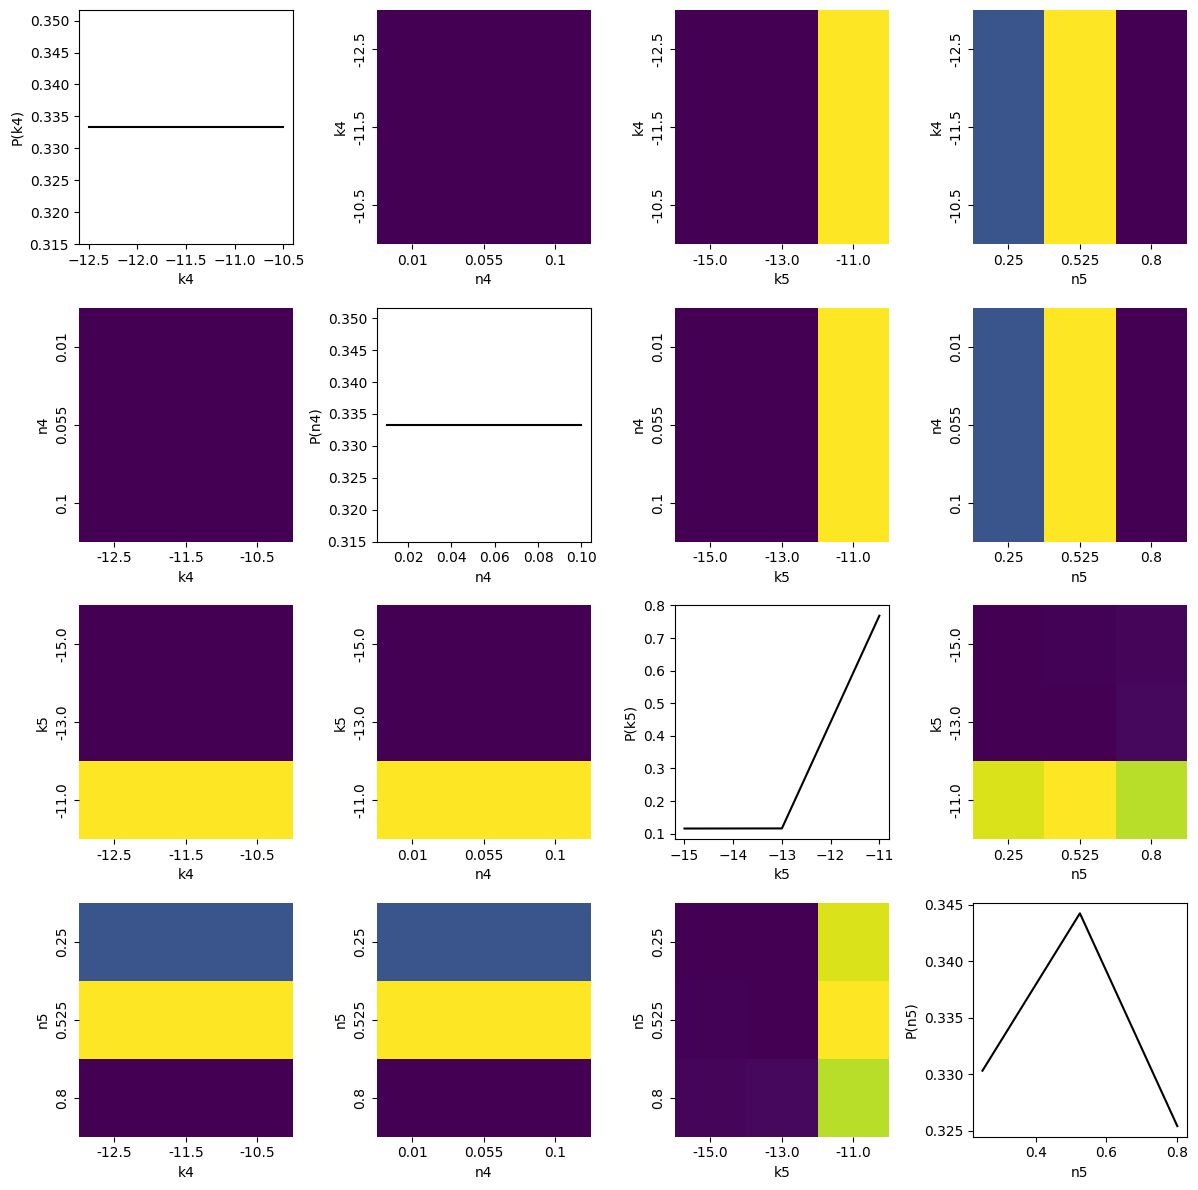

In [51]:
plot_joint_posterior(mse_table, param_cols, param_units=None, cmap="viridis")